In [46]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
% matplotlib inline

In [53]:
#load data dictionary from pkl file
iontype = "Na"
SM_NUM = 2
ERROR_NUM = 3
sm_str = "SM"+str(SM_NUM)
f = open("/media/icg-channels/icg-channels-"+iontype+".pkl","rb")
data_dict = pickle.load(f)

#data_dict['64229_arhRT03.mod']['ICG_SM1'] = False
#data_dict['64229_arhRT03_v2.mod']['ICG_SM1'] = False

In [54]:
# get list of normal trace files and sm_trace files

tracedir = "/media/icg-channels/icg-channels-"+iontype+"/"
protocols = ['act','deact','inact','ramp','ap']

orig_traces = []
sm_traces =[]
for (dirpath, dirnames, filenames) in os.walk(tracedir):
    if 'ICG_'+sm_str in dirpath:
        for file in filenames:
            if ".i" in file and "sm"+str(SM_NUM)+"_" in file:
                sm_traces.append(file)
    if 'ICG_ORIG' in dirpath:
        for file in filenames:
            if ".i" in file:
                orig_traces.append(file)

orig_traces_unique = orig_traces.copy()
for i in range(len(orig_traces)):
    for p in protocols:
        orig_traces_unique[i] = orig_traces_unique[i].replace('_'+p+'.i','.mod')
orig_traces_unique = sorted(list(set(orig_traces_unique)))

sm_traces_unique = sm_traces.copy()
for i in range(len(sm_traces)):
    for p in protocols:
        sm_traces_unique[i] = sm_traces_unique[i].replace('_'+p+'.i','.mod')
        sm_traces_unique[i] = sm_traces_unique[i].replace('sm'+str(SM_NUM)+'_','')
sm_traces_unique = sorted(list(set(sm_traces_unique)))

print("Ion type: ",iontype)
print("Number of original file traces: ",len(orig_traces_unique))
print("Number of supermodel file traces: ", len(sm_traces_unique))

Ion type:  Na
Number of original file traces:  703
Number of supermodel file traces:  425


In [55]:
# extract icg errors

protocol_err_str = ['act','deact','inact','ramp','ap','total']
icg_errors = []
for x in data_dict.keys():
    if (data_dict[x]['RATES'] and data_dict[x]['SM1_FIT'] 
                                 and data_dict[x]['ICG_'+sm_str] and data_dict[x]['ICG_ORIG']):
        tmp = []
        for p in protocol_err_str:
            tmp.append(data_dict[x]['ICG_'+sm_str+'_ERROR'+str(ERROR_NUM)][p])
        icg_errors.append(np.array(tmp))
icg_errors = np.array(icg_errors)    
total_icg_errors = icg_errors[:,5]

print('files w/ total error <0.1: ', len(total_icg_errors[total_icg_errors<0.1]))

files w/ total error <0.1:  142


In [56]:
icg_errors[np.isnan(icg_errors)] = -1
total_icg_errors = icg_errors[:,5]

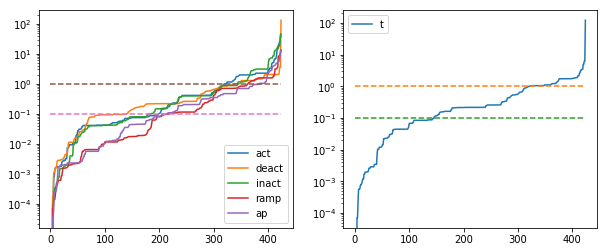

In [57]:
# plot sorted errors

sorted_icg_errors = np.sort(icg_errors,axis=0)

f = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for i in range(5):
    plt.plot(sorted_icg_errors[:,i])
plt.legend(protocol_err_str)
plt.plot(np.arange(0,icg_errors.shape[0]),np.ones((icg_errors.shape[0],)),'--')
plt.plot(np.arange(0,icg_errors.shape[0]),0.1*np.ones((icg_errors.shape[0],)),'--')
plt.gca().set_yscale("log")
plt.subplot(1,2,2)
plt.plot(sorted_icg_errors[:,-1])
plt.legend(('total'))
plt.plot(np.arange(0,icg_errors.shape[0]),np.ones((icg_errors.shape[0],)),'--')
plt.plot(np.arange(0,icg_errors.shape[0]),0.1*np.ones((icg_errors.shape[0],)),'--')
plt.gca().set_yscale("log")

/opt/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/opt/anaconda/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:725: RuntimeWarning: invalid value encountered in greater
  if np.any(bin_edges[:-1] > bin_edges[1:]):


Text(0,0.5,'Number of models')

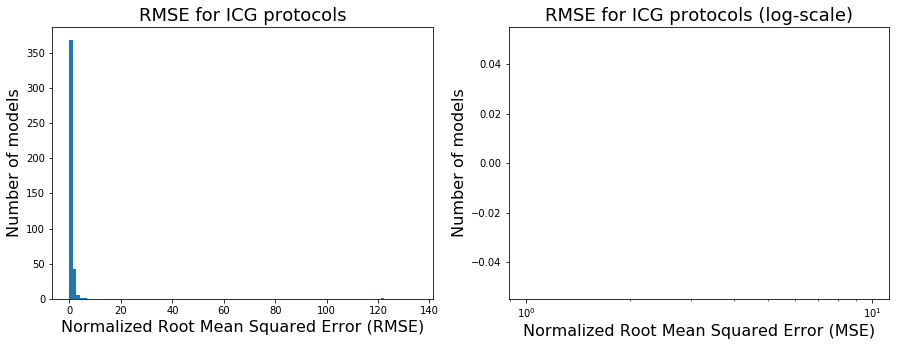

<Figure size 720x360 with 0 Axes>

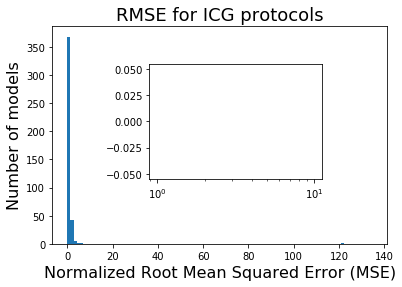

In [7]:
# plot histogram of results for total error

maxrange = 1.1*np.max(total_icg_errors)
minlogrange = np.floor(np.log10(np.min(total_icg_errors)))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
h = plt.hist(total_icg_errors,range=(0,maxrange),bins=100)
plt.title('RMSE for ICG protocols',fontsize=18)
plt.xlabel('Normalized Root Mean Squared Error (RMSE)',fontsize=16)
plt.ylabel('Number of models',fontsize=16)

plt.subplot(1,2,2)
h = plt.hist(total_icg_errors,bins=np.logspace(minlogrange,np.log10(maxrange),100))
plt.gca().set_xscale("log")
plt.title('RMSE for ICG protocols (log-scale)',fontsize=18)
plt.xlabel('Normalized Root Mean Squared Error (MSE)',fontsize=16)
plt.ylabel('Number of models',fontsize=16)

plt.figure(figsize=(10,5))
fig, ax1 = plt.subplots()
left, bottom, width, height = [0.35, 0.35, 0.4, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])
h = ax1.hist(total_icg_errors,range=(0,maxrange),bins=100)
h = ax2.hist(total_icg_errors,bins=np.logspace(minlogrange,np.log10(maxrange),100))
ax2.set_xscale("log")
plt.sca(ax1)
plt.title('RMSE for ICG protocols',fontsize=18)
plt.xlabel('Normalized Root Mean Squared Error (MSE)',fontsize=16)
plt.ylabel('Number of models',fontsize=16)


/opt/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/opt/anaconda/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:725: RuntimeWarning: invalid value encountered in greater
  if np.any(bin_edges[:-1] > bin_edges[1:]):
/opt/anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


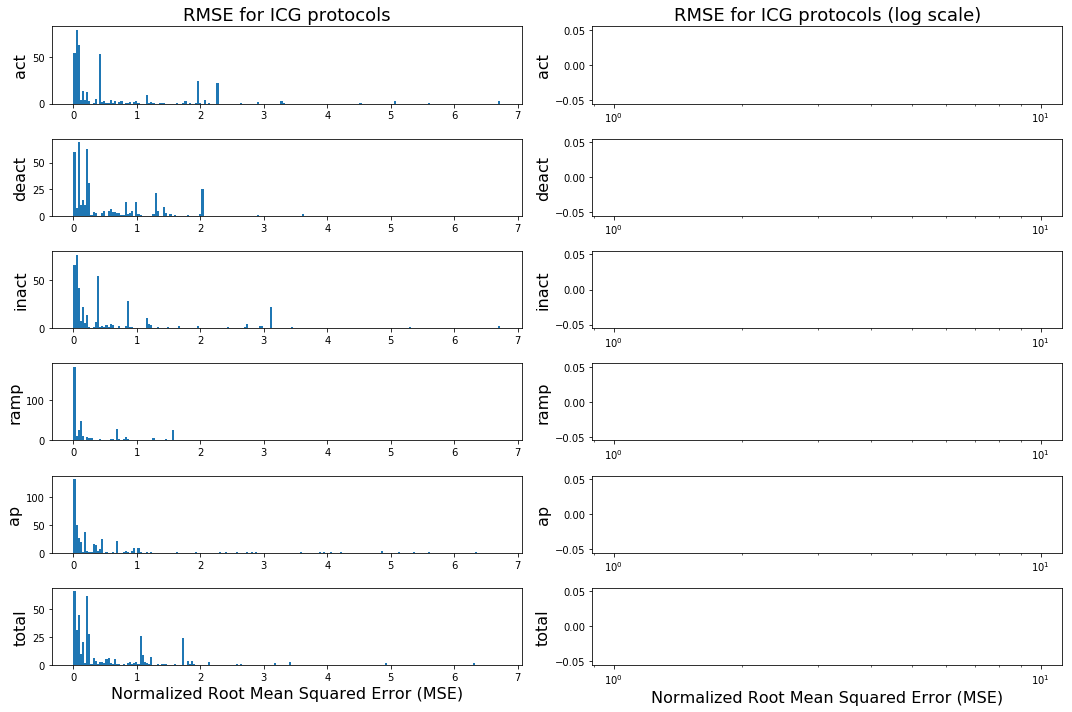

In [63]:
# histogram for individual protocols

maxrange = 1.1*np.max(total_icg_errors)
minlogrange = np.floor(np.log10(np.min(total_icg_errors)))

plt.figure(figsize=(15,10))

for i in range(len(protocol_err_str)):

    plt.subplot(6,2,2*i+1)
    h = plt.hist(icg_errors[:,i],range=(0,maxrange/20),bins=200)
    plt.ylabel(protocol_err_str[i],fontsize=16)
    plt.subplot(6,2,2*i+2)
    h = plt.hist(icg_errors[:,i],bins=np.logspace(minlogrange,np.log10(maxrange),100))
    plt.gca().set_xscale("log")
    plt.ylabel(protocol_err_str[i],fontsize=16)

plt.subplot(6,2,1)
plt.title('RMSE for ICG protocols',fontsize=18)
plt.subplot(6,2,2)
plt.title('RMSE for ICG protocols (log scale)',fontsize=18)
plt.subplot(6,2,11)
plt.xlabel('Normalized Root Mean Squared Error (MSE)',fontsize=16)
plt.subplot(6,2,12)
plt.xlabel('Normalized Root Mean Squared Error (MSE)',fontsize=16)
plt.tight_layout()

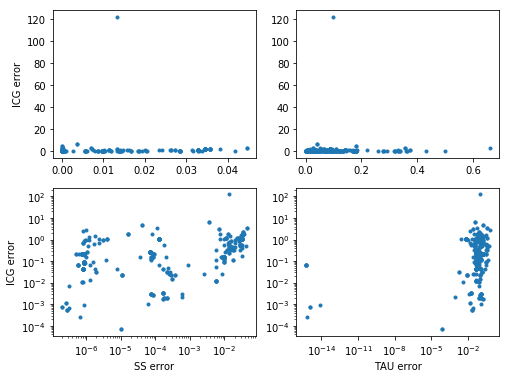

In [9]:
# compare modelfit rmse with protocol rmse

err_list = []
for k in data_dict.keys():
    if (data_dict[k]['ICG_SM1'] and data_dict[k]['SM1_FIT']):
        ss_err = sum(data_dict[k][sm_str+'_ERROR'+str(ERROR_NUM)+'_SS'].values())
        tau_err = sum(data_dict[k][sm_str+'_ERROR'+str(ERROR_NUM)+'_TAU'].values())
        icg_err = data_dict[k]['ICG_'+sm_str+'_ERROR'+str(ERROR_NUM)]['total']
        err_list.append((ss_err,tau_err,icg_err))
err_list = np.array(err_list)
        
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.plot(err_list[:,0],err_list[:,2],'.')
plt.ylabel('ICG error')
plt.subplot(2,2,2)
plt.plot(err_list[:,1],err_list[:,2],'.')
plt.subplot(2,2,3)
plt.plot(err_list[:,0],err_list[:,2],'.')
plt.ylabel('ICG error')
plt.xlabel('SS error')
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.subplot(2,2,4)
plt.plot(err_list[:,1],err_list[:,2],'.')
plt.xlabel('TAU error')
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")


In [35]:
for i in range(len(tau_err)):
    print(i,tau_err[i])

TypeError: object of type 'numpy.float64' has no len()

173 139654_fh.mod
fit SS rms:  0.016506355712155578
fit TAU rms:  0.1681006900160501
icg total rms:  0.3947073700079383
icg each rms:  dict_values([0.4527528305230493, 1.0271960798192585, 0.3941946604988777, 0.7981125638346833, 0.28867032208309445, 0.3947073700079383])
act (4001, 17)


/opt/anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


deact (3201, 16)
inact (70001, 13)
ramp (116000, 2)
ap (72001, 2)


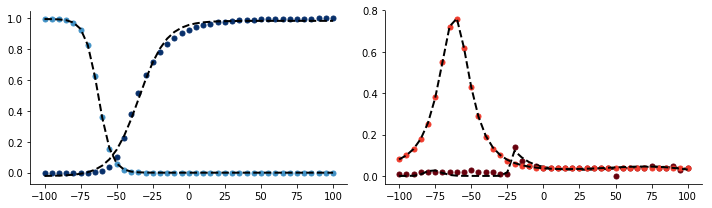

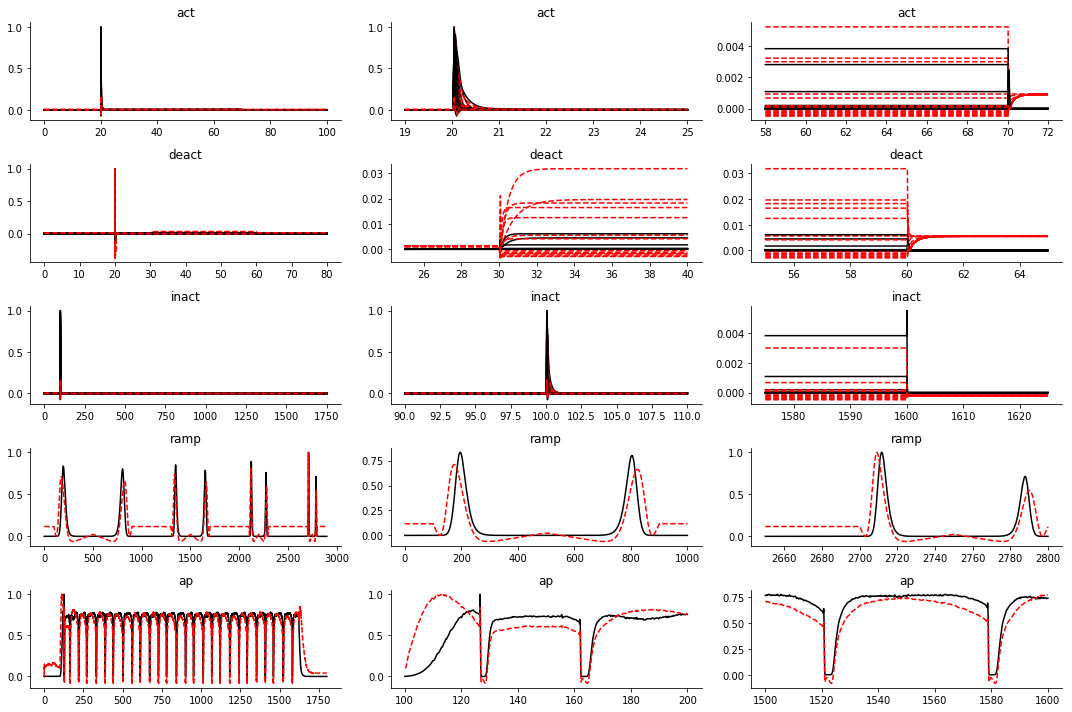

In [58]:
# look at individual examples

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


clr1 = ['#08306b','#4292c6']
clr2 = ['#67000d','#ef3b2c']

import sys
sys.path.insert(0, '../supermodel_test/')
from supermodel import *
tau_fit_fcn = tau_fun3 # for SM1 -- third-order
if (SM_NUM==2):
    ss_fit_fcn = modified_sigmoid
else:
    ss_fit_fcn = sigmoid

# plot some specific examples
protocols = ['act','deact','inact','ramp','ap']
Vfit = np.linspace(-100,100,41)

# views for each iontype and protocol
xskip=1
pview = {'K': {'act': [np.arange(40*0,40*700+1,xskip),np.arange(40*90,40*110+1,xskip),np.arange(40*580,40*610+1,xskip)],
               'deact': [np.arange(40*0,40*700+1,xskip),np.arange(40*390,40*450+1,xskip),np.arange(40*580,40*610+1,xskip)],
               'inact': [np.arange(40*0,40*1750+1,xskip),np.arange(40*90,40*110+1,xskip),np.arange(40*1575,40*1625+1,xskip)],
               'ramp': [np.arange(40*0,40*2899+1,xskip),np.arange(40*0,40*1000+1,xskip),np.arange(40*2650,40*2800+1,xskip)],
               'ap': [np.arange(40*0,40*1800+1,xskip),np.arange(40*100,40*200+1,xskip),np.arange(40*1500,40*1600+1,xskip)]},
        'Na': {'act': [np.arange(40*0,40*100+1,xskip),np.arange(40*19,40*25+1,xskip),np.arange(40*58,40*72+1,xskip)],
               'deact': [np.arange(40*0,40*80+1,xskip),np.arange(40*25,40*40+1,xskip),np.arange(40*55,40*65+1,xskip)],
               'inact': [np.arange(40*0,40*1750+1,xskip),np.arange(40*90,40*110+1,xskip),np.arange(40*1575,40*1625+1,xskip)],
               'ramp': [np.arange(40*0,40*2899+1,xskip),np.arange(40*0,40*1000+1,xskip),np.arange(40*2650,40*2800+1,xskip)],
               'ap': [np.arange(40*0,40*1800+1,xskip),np.arange(40*100,40*200+1,xskip),np.arange(40*1500,40*1600+1,xskip)]},
        'Ca': {'act': [np.arange(40*0,40*700+1,xskip),np.arange(40*90,40*110+1,xskip),np.arange(40*580,40*610+1,xskip)],
               'deact': [np.arange(40*0,40*700+1,xskip),np.arange(40*390,40*450+1,xskip),np.arange(40*580,40*610+1,xskip)],
               'inact': [np.arange(40*0,40*1750+1,xskip),np.arange(40*90,40*110+1,xskip),np.arange(40*1575,40*1625+1,xskip)],
               'ramp': [np.arange(40*0,40*2899+1,xskip),np.arange(40*0,40*1000+1,xskip),np.arange(40*2650,40*2800+1,xskip)],
               'ap': [np.arange(40*0,40*1800+1,xskip),np.arange(40*100,40*200+1,xskip),np.arange(40*1500,40*1600+1,xskip)]},
        'IH': {'act': [], 'deact': [], 'inact': [], 'ramp': [], 'ap': []}}

to_plot = [173]
# bad: 0,15
# good: 6,8
#K,35
#Na,61, 173

for i in to_plot:
    otr = orig_traces_unique[i]
    otr_prefix = otr.split(".")[0]
    print(i,otr)
    if not data_dict[otr]['ICG_'+sm_str]:
        print("No SM traces found.")
    else:
        print('fit SS rms: ',np.mean(list(data_dict[otr][sm_str+'_ERROR'+str(ERROR_NUM)+'_SS'].values())))
        print('fit TAU rms: ',np.mean(list(data_dict[otr][sm_str+'_ERROR'+str(ERROR_NUM)+'_TAU'].values())))
        print('icg total rms: ',data_dict[otr]['ICG_'+sm_str+'_ERROR'+str(ERROR_NUM)]['total'])
        print('icg each rms: ',data_dict[otr]['ICG_'+sm_str+'_ERROR'+str(ERROR_NUM)].values())
        orig_inds = [j for j,x in enumerate(orig_traces) if otr in x]
        sm_inds = [j for j,x in enumerate(sm_traces) if otr in x]

        gatevars = data_dict[otr]['STATES']
        f1 = plt.figure(figsize=(10,3))
        c=0
        for v in gatevars:
            inf_popt = data_dict[otr][sm_str+'_PARAMS_SS'][v]
            tau_popt = data_dict[otr][sm_str+'_PARAMS_TAU'][v]
            os.listdir(tracedir+'/'+otr+'/RATES/')
            inf_data = np.loadtxt(tracedir+'/'+otr+'/RATES/'+data_dict[otr]['SUFFIX']+"."+v+'.inf.37.dat')
            tau_data = np.loadtxt(tracedir+'/'+otr+'/RATES/'+data_dict[otr]['SUFFIX']+"."+v+'.tau.37.dat')
            ax=plt.subplot(1,2,1)
            plt.plot(inf_data[:,0], inf_data[:,1], '.',c=clr1[c],markersize=10)
            plt.plot(Vfit, ss_fit_fcn(Vfit, *inf_popt), 'k--',linewidth=2)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax=plt.subplot(1,2,2)
            plt.plot(tau_data[:,0], tau_data[:,1], '.',c=clr2[c],markersize=10)
            plt.plot(Vfit, tau_fit_fcn(Vfit, *tau_popt), 'k--',linewidth=2)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            c+=1
        plt.tight_layout()

        f2 = plt.figure(figsize=(15,10))
        for j in range(len(protocols)):
            p = protocols[j]
            orig_fname = [n for n in orig_traces if n == otr_prefix+'_'+p+'.i']
            sm_fname = [n for n in sm_traces if n == 'sm'+str(SM_NUM)+'_'+otr_prefix+'_'+p+'.i']
            if not orig_fname or not sm_fname:
                print("File not found for name: ",otr,", protocol: ",p)
                continue
            orig_data = np.loadtxt("/media/icg-channels/icg-channels-"+iontype+"/"+otr+"/ICG_ORIG/"+orig_fname[0])
            sm_data = np.loadtxt("/media/icg-channels/icg-channels-"+iontype+"/"+otr+"/ICG_"+sm_str+"/sm"+str(SM_NUM)+"_"+sm_fname[0].split("_",1)[1])
            print(protocols[j],orig_data.shape)
            for l in range(3):
                ax=plt.subplot(5,3,3*j+l+1)
                for k in range(1,orig_data.shape[1]):
                    plt.plot(orig_data[pview[iontype][protocols[j]][l],0],orig_data[pview[iontype][protocols[j]][l],k],'k-')
                    plt.plot(sm_data[pview[iontype][protocols[j]][l],0],sm_data[pview[iontype][protocols[j]][l],k],'r--')
                    plt.title(p)
                    ax.spines['right'].set_visible(False)
                    ax.spines['top'].set_visible(False)
plt.tight_layout()

f1.savefig(otr+"_smfit.pdf", bbox_inches='tight')
f2.savefig(otr+"_icg.pdf", bbox_inches='tight')

In [21]:
70000/40

1750.0